In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.utils.extmath import safe_sparse_dot

## Data Loading

In [2]:
train_data = pd.read_csv("Fashion-MNIST/fashion-mnist_train.csv").head(8000)
test_data = pd.read_csv("Fashion-MNIST/fashion-mnist_test.csv").head(2000)

In [3]:
train_data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing

In [ ]:
# Normalisation

X_train = train_data.drop(columns=['label']).values / 255.0
y_train = train_data['label'].values
X_test = test_data.drop(columns=['label']).values / 255.0
y_test = test_data['label'].values

In [17]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
y_train

array([2, 9, 6, ..., 6, 4, 8], dtype=int64)

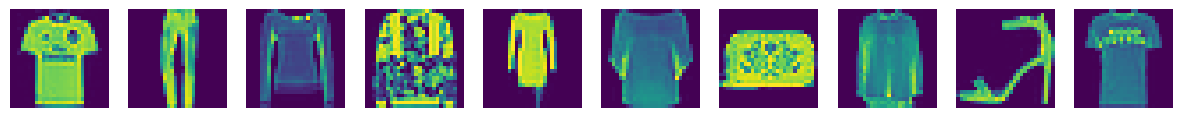

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28))
    ax.axis('off')
plt.show()

## MLP Classifier

In [5]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# activation functions and dictionary to store loss histories
activations = ['logistic', 'tanh', 'relu', 'identity']
loss_history = {}
accuracies = {}

# Loop over each activation function
for activation in activations:
    mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation=activation,
                        solver='adam', max_iter=1, batch_size=128,
                        learning_rate_init=2e-5, warm_start=True)
    
    # Track loss for each epoch
    training_loss = []
    validation_loss = []
    test_loss = []

    training_accuracy = []
    validation_accuracy = []
    test_accuracy = []
    
    # Train model for 100 epochs manually to log losses
    for epoch in range(100):
        mlp.fit(X_train_split, y_train_split)  # Train for one epoch
        
        # Calculate training loss
        y_train_pred = mlp.predict_proba(X_train_split)
        train_loss = log_loss(y_train_split, y_train_pred)
        training_loss.append(train_loss)

        # Calculate training accuracy
        y_train_pred = mlp.predict(X_train_split)
        train_accuracy = accuracy_score(y_train_split, y_train_pred)
        training_accuracy.append(train_accuracy)
        
        # Calculate validation loss
        y_val_pred = mlp.predict_proba(X_val_split)
        val_loss = log_loss(y_val_split, y_val_pred)
        validation_loss.append(val_loss)

        # Calculate validation accuracy
        y_val_pred = mlp.predict(X_val_split)
        val_accuracy = accuracy_score(y_val_split, y_val_pred)
        validation_accuracy.append(val_accuracy)

        # Calculate test loss
        y_test_pred = mlp.predict_proba(X_test)
        test_loss.append(log_loss(y_test, y_test_pred))

        # Calculate test accuracy
        y_test_pred = mlp.predict(X_test)
        test_accuracy.append(accuracy_score(y_test, y_test_pred))
    
    # Store loss history for this activation function
    loss_history[activation] = {'train_loss': training_loss, 'val_loss': validation_loss, 'test_loss': test_loss}
    accuracies[activation] = {'train_accuracy': training_accuracy, 'val_accuracy': validation_accuracy, 'test_accuracy': test_accuracy}


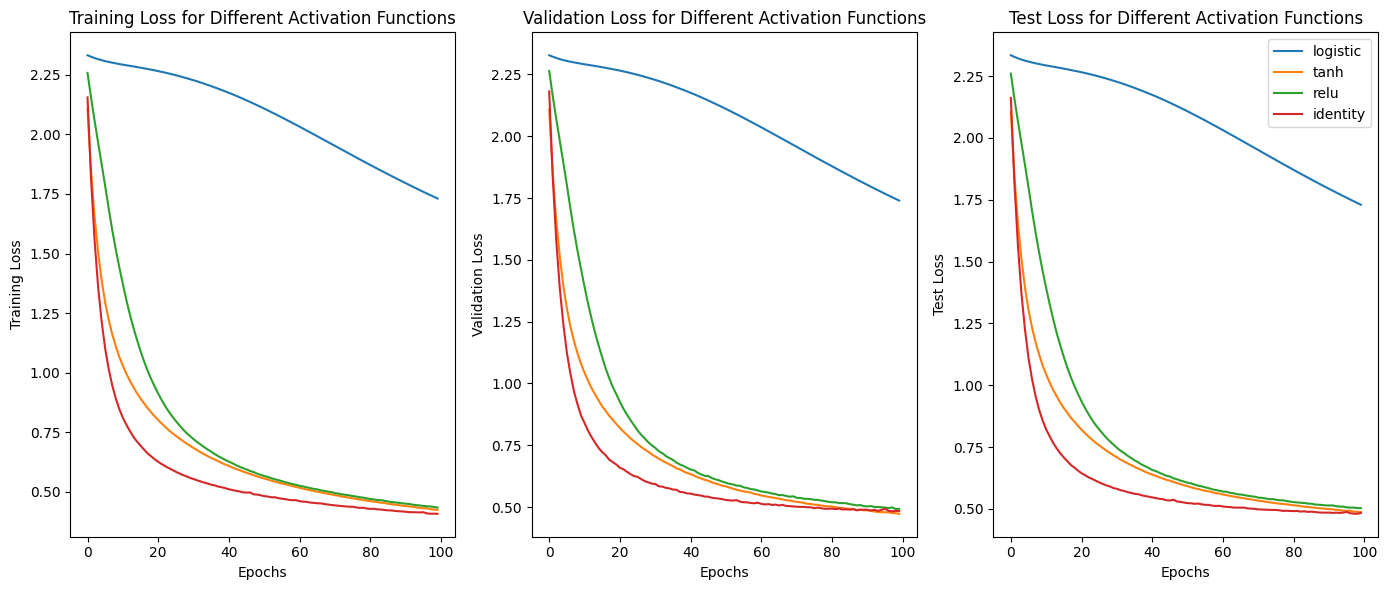

In [18]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
for activation in activations:
    plt.plot(loss_history[activation]['train_loss'], label=activation)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss for Different Activation Functions')

plt.subplot(1, 3, 2)
for activation in activations:
    plt.plot(loss_history[activation]['val_loss'], label=activation)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for Different Activation Functions')

plt.subplot(1, 3, 3)
for activation in activations:
    plt.plot(loss_history[activation]['test_loss'], label=activation)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Test Loss for Different Activation Functions')

plt.tight_layout()
plt.legend()
plt.show()

We notice that Identity and Tanh both perform well on the validation as well as test dataset. Identity is a linear activation function and Tanh is a non-linear activation function. Loss in case of Identity decreases faster then Tanh. Logistic activation function performs the worst out of all four. Relu also manages to decrease its loss almost as much as Identity and Tanh but it is slower than both.

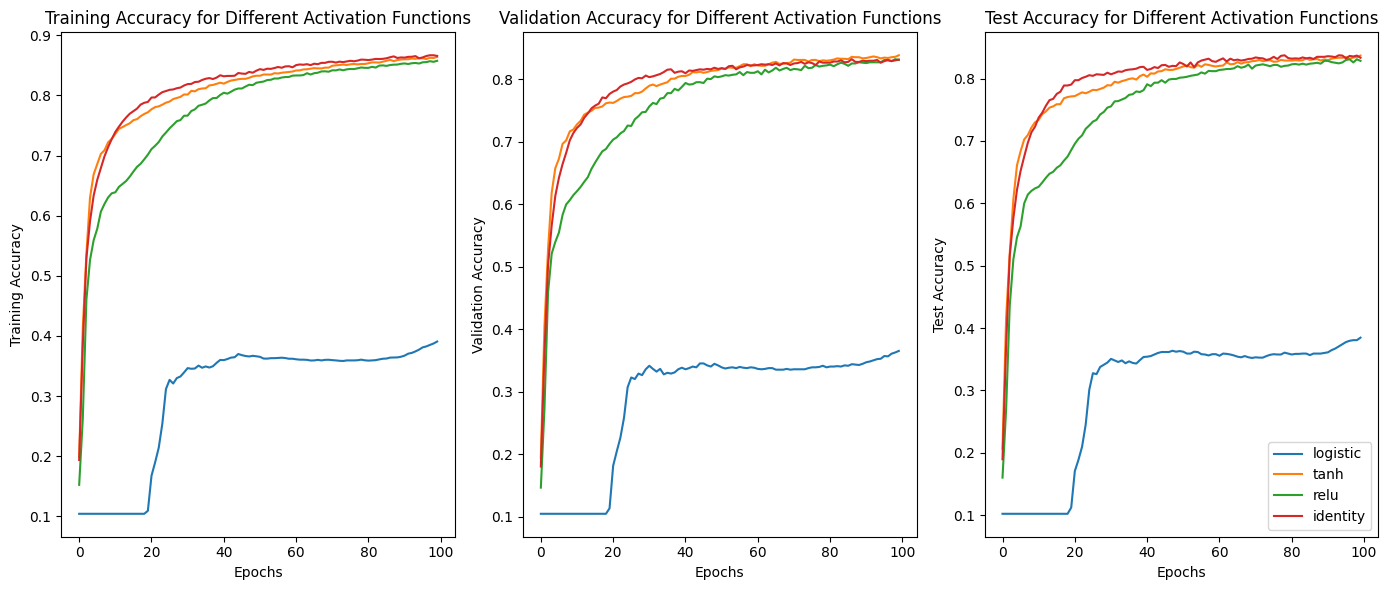

In [19]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
for activation in activations:
    plt.plot(accuracies[activation]['train_accuracy'], label=activation)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy for Different Activation Functions')

plt.subplot(1, 3, 2)
for activation in activations:
    plt.plot(accuracies[activation]['val_accuracy'], label=activation)  
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for Different Activation Functions')

plt.subplot(1, 3, 3)
for activation in activations:
    plt.plot(accuracies[activation]['test_accuracy'], label=activation)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Activation Functions')

plt.tight_layout()
plt.legend()
plt.show()

The accuracy curves also show that while logistic fails to achieve good accuracy on train, val or test data, Identity, Tanh and Relu all perform well on all three datasets.

## Grid Search

In [30]:
param_grid = {
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [2e-5, 1e-4, 1e-3],
    'batch_size': [32, 64, 128]
}

grid_search = GridSearchCV(MLPClassifier(hidden_layer_sizes=(128, 64, 32), max_iter=100, activation='tanh'),
                           param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

results_df = pd.DataFrame(grid_search.cv_results_)
print("Full grid search results:")
print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found:  {'batch_size': 128, 'learning_rate_init': 0.0001, 'solver': 'adam'}
Full grid search results:
                                               params  mean_test_score  \
0   {'batch_size': 32, 'learning_rate_init': 2e-05...         0.807375   
1   {'batch_size': 32, 'learning_rate_init': 2e-05...         0.761375   
2   {'batch_size': 32, 'learning_rate_init': 0.000...         0.804625   
3   {'batch_size': 32, 'learning_rate_init': 0.000...         0.803125   
4   {'batch_size': 32, 'learning_rate_init': 0.001...         0.612625   
5   {'batch_size': 32, 'learning_rate_init': 0.001...         0.480375   
6   {'batch_size': 64, 'learning_rate_init': 2e-05...         0.792625   
7   {'batch_size': 64, 'learning_rate_init': 2e-05...         0.706250   
8   {'batch_size': 64, 'learning_rate_init': 0.000...         0.813125   
9   {'batch_size': 64, 'learning_rate_init': 0.000...         0.799375   
10  {'b

C:\Users\Ritika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


We performed grid search on the following parameters:
   - 'solver': ['adam', 'sgd']
   - 'learning_rate_init': [2e-5, 1e-4, 1e-3]
   - 'batch_size': [32, 64, 128]

and found that the best hyperparameters are:\
{'batch_size': 128, 'learning_rate_init': 0.0001, 'solver': 'adam'}

## MLP Regressor

### Using "Relu" and "identity" Activation Function

Here we are basically doing dimensionality reduction due to the way in which our layer sizes are designed. We are using the "relu" activation function and "identity" activation function. We are trying to regenerate the images using the MLP regressor (here the value of a = 32 but once it will cross 100 the accuracy of regeneration will saturate).

In [ ]:
def get_feature_vectors(model, data, layer_index=2):
    layer_output = data
    for i, layer_weights in enumerate(model.coefs_):
        layer_output = safe_sparse_dot(layer_output, layer_weights) + model.intercepts_[i]
        if i == layer_index:
            if model.activation == 'relu':
                layer_output = np.maximum(0, layer_output)
            elif model.activation == 'identity':
                pass  
            break  
    return layer_output

In [ ]:
layer_sizes = [128, 64, 32, 64, 128]
activations = ['relu', 'identity']
generated_images = {}
loss_history = {activation: {'train_loss': [], 'val_loss': [], 'test_loss': []} for activation in activations}
feature_vectors = {activation: {'train': [], 'val': [], 'test': []} for activation in activations}
accuracies = {activation: {'train_accuracy': [], 'val_accuracy': [], 'test_accuracy': []} for activation in activations}

for activation in activations:
    mlp_regr = MLPRegressor(hidden_layer_sizes=layer_sizes, activation=activation,
                            solver='adam', max_iter=1, learning_rate_init=2e-5, warm_start=True)
    for epoch in range(100):
        mlp_regr.fit(X_train_split, X_train_split)

        # Calculate training loss
        X_train_pred = mlp_regr.predict(X_train_split)
        train_loss = np.mean((X_train_split - X_train_pred) ** 2)
        loss_history[activation]['train_loss'].append(train_loss)

        # Calculate validation loss
        X_val_pred = mlp_regr.predict(X_val_split)
        val_loss = np.mean((X_val_split - X_val_pred) ** 2)
        loss_history[activation]['val_loss'].append(val_loss)

        # Calculate test loss
        X_test_pred = mlp_regr.predict(X_test)
        test_loss = np.mean((X_test - X_test_pred) ** 2)
        loss_history[activation]['test_loss'].append(test_loss)

        # Calculate training accuracy
        training_accuracy = accuracy_score(y_train_split, y_train_pred)
        accuracies[activation]['train_accuracy'].append(training_accuracy)

        # Calculate validation accuracy
        validation_accuracy = accuracy_score(y_val_split, y_val_pred)
        accuracies[activation]['val_accuracy'].append(validation_accuracy)

        # Calculate test accuracy
        test_accuracy = accuracy_score(y_test, y_test_pred)
        accuracies[activation]['test_accuracy'].append(test_accuracy)
    
    # Store feature vectors for training and test data
    feature_vectors[activation]['train'] = get_feature_vectors(mlp_regr, X_train_split)
    feature_vectors[activation]['val'] = get_feature_vectors(mlp_regr, X_val_split)
    feature_vectors[activation]['test'] = get_feature_vectors(mlp_regr, X_test)

    
    
    # Generate images
    generated_images[activation] = mlp_regr.predict(X_test[:10])

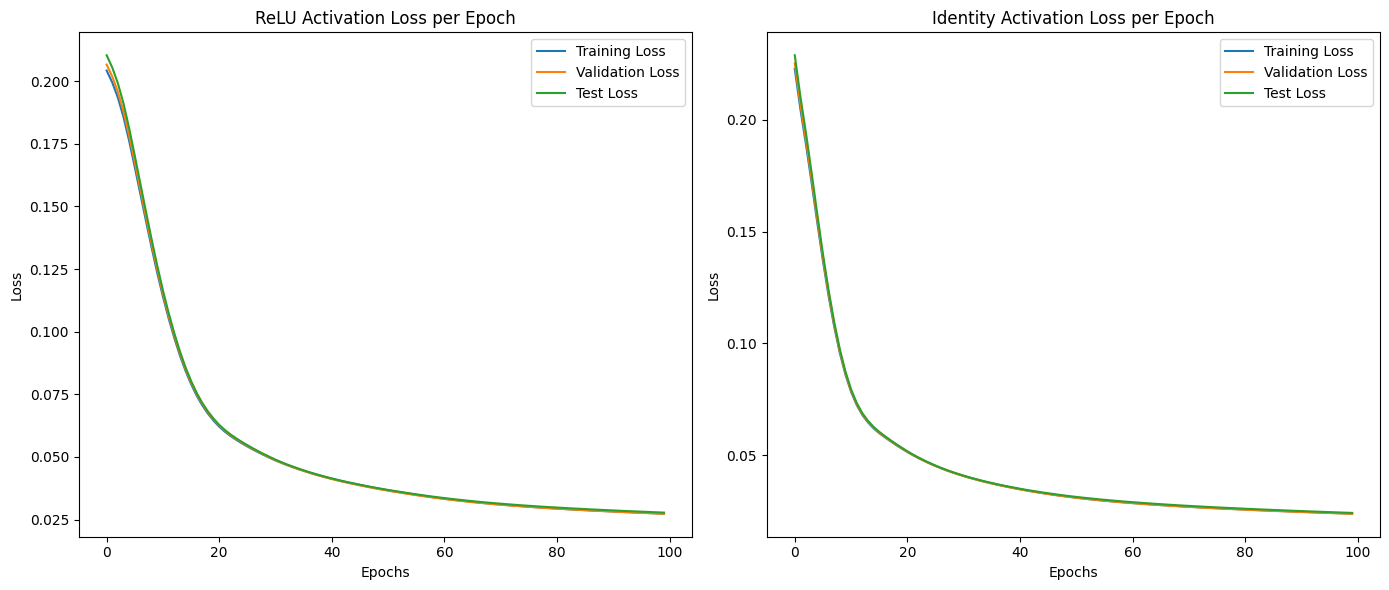

In [28]:
# Create a 1x2 grid of subplots for relu and identity activation losses
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot losses for the 'relu' activation function
axs[0].plot(loss_history['relu']['train_loss'], label='Training Loss')
axs[0].plot(loss_history['relu']['val_loss'], label='Validation Loss')
axs[0].plot(loss_history['relu']['test_loss'], label='Test Loss')
axs[0].set_title('ReLU Activation Loss per Epoch')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot losses for the 'identity' activation function
axs[1].plot(loss_history['identity']['train_loss'], label='Training Loss')
axs[1].plot(loss_history['identity']['val_loss'], label='Validation Loss')
axs[1].plot(loss_history['identity']['test_loss'], label='Test Loss')
axs[1].set_title('Identity Activation Loss per Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


Identity does a better job at reducing loss, however Relu also performs almost as good. 

## Plotting regenerated images

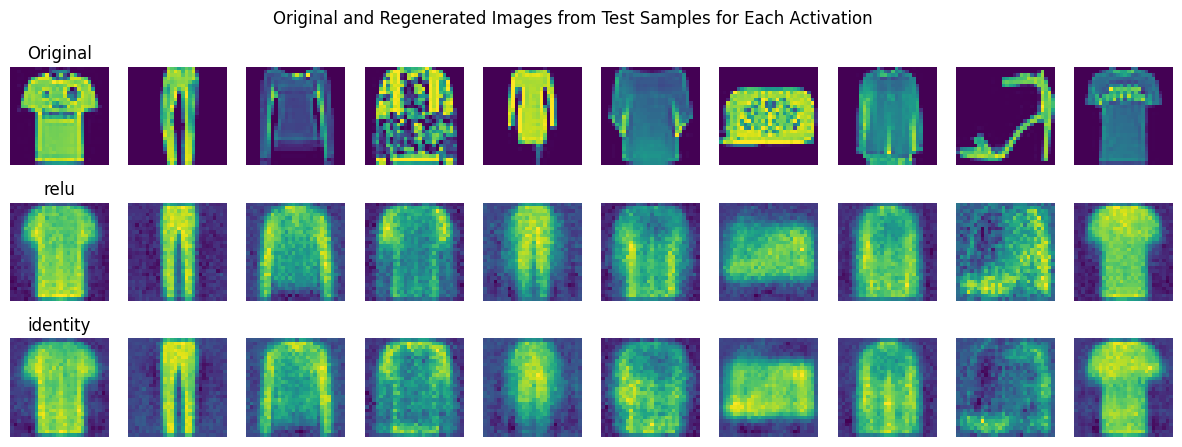

In [29]:
fig, axes = plt.subplots(3, 10, figsize=(15, 5))

for j in range(10):
    axes[0, j].imshow(X_test[j].reshape(28, 28))
    axes[0, j].axis('off')
    if j == 0:
        axes[0, j].set_title('Original')

for i, activation in enumerate(activations):
    for j in range(10):
        axes[i + 1, j].imshow(generated_images[activation][j].reshape(28, 28))
        axes[i + 1, j].axis('off')
        if j == 0:
            axes[i + 1, j].set_title(activation)
plt.suptitle('Original and Regenerated Images from Test Samples for Each Activation')
plt.show()

## MLP Classifiers on new set of extracted features

In [31]:
# Define new MLPClassifier model with 2 hidden layers of size 'a' = 32
new_relu = MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=200, 
                                    solver='adam', learning_rate_init=2e-5)
new_identity = MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=200, 
                                        solver='adam', learning_rate_init=2e-5)

# Fit these new classifiers on the training feature vectors
feature_vectors_relu_train = feature_vectors['relu']['train'].reshape(-1, 32)
feature_vectors_identity_train = feature_vectors['identity']['train'].reshape(-1, 32)

new_relu.fit(feature_vectors_relu_train, y_train_split)
new_identity.fit(feature_vectors_identity_train, y_train_split)

# Predict and evaluate accuracy on val and test feature vectors
feature_vectors_relu_val = feature_vectors['relu']['val'].reshape(-1, 32)
feature_vectors_identity_val = feature_vectors['identity']['val'].reshape(-1, 32)

y_pred_relu_val = new_relu.predict(feature_vectors_relu_val)
y_pred_identity_val = new_identity.predict(feature_vectors_identity_val)

feature_vectors_relu_test = feature_vectors['relu']['test'].reshape(-1, 32)
feature_vectors_identity_test = feature_vectors['identity']['test'].reshape(-1, 32)

y_pred_relu = new_relu.predict(feature_vectors_relu_test)
y_pred_identity = new_identity.predict(feature_vectors_identity_test)

accuracy_relu_train = accuracy_score(y_train_split, new_relu.predict(feature_vectors_relu_train))
accuracy_identity_train = accuracy_score(y_train_split, new_identity.predict(feature_vectors_identity_train))

accuracy_relu_val = accuracy_score(y_val_split, y_pred_relu_val)
accuracy_identity_val = accuracy_score(y_val_split, y_pred_identity_val)

accuracy_relu = accuracy_score(y_test, y_pred_relu)
accuracy_identity = accuracy_score(y_test, y_pred_identity)

print("Accuracy for new classifier (ReLU) on training set:", accuracy_relu_train * 100, "%")
print("Accuracy for new classifier (Identity) on training set:", accuracy_identity_train * 100, "%")

print("Accuracy for new classifier (ReLU) on validation set:", accuracy_relu_val * 100, "%")
print("Accuracy for new classifier (Identity) on validation set:", accuracy_identity_val * 100, "%")

print("Accuracy for new classifier (ReLU):", accuracy_relu * 100, "%")
print("Accuracy for new classifier (Identity):", accuracy_identity * 100, "%")


C:\Users\Ritika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for new classifier (ReLU) on training set: 64.15625 %
Accuracy for new classifier (Identity) on training set: 71.671875 %
Accuracy for new classifier (ReLU) on validation set: 63.24999999999999 %
Accuracy for new classifier (Identity) on validation set: 71.5625 %
Accuracy for new classifier (ReLU): 62.55 %
Accuracy for new classifier (Identity): 70.5 %


C:\Users\Ritika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Even though we reduced the number of features from 784 to 32, the accuracy of the MLP classifier is still decent. This is because the features that we have extracted are dense representation that contain high level information about the images which our regressor has learned. Thus even though we have reduced the complexity, the most important information is still retained.